In [3]:
!pip3 install pandas
!pip3 install wordcloud
!pip3 install gensim
!pip3 install nltk

  Using cached https://files.pythonhosted.org/packages/c3/e2/00cacecafbab071c787019f00ad84ca3185952f6bb9bca9550ed83870d4d/pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/70/94/784178ca5dd892a98f113cdd923372024dc04b8d40abe77ca76b5fb90ca6/pytz-2021.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d9/5a/e7c31adbe875f2abbb91bd84cf2dc52d792b5a01506781dbcf25c91daf11/six-1.16.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 368kB 2.8MB/s ta 0:00:01
    100% |████████████████████████████████| 3.0MB 675kB/s eta 0:00:01
    100% |████████████████████████████████| 11.5MB 

In [4]:
import re
import nltk
import gensim
nltk.download('stopwords')

import pandas as pd
import gensim.corpora as corpora

from wordcloud import WordCloud
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/czh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# Load and clean data
data_df = pd.read_csv('data/PRIMERAVUELTA2018-FINAL.csv')
url_re_str = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"

data_df['text'] = data_df['text'].map(lambda x: str(x))
data_df['text'] = data_df['text'].map(lambda x: re.sub(url_re_str, '', x))
data_df['text'] = data_df['text'].map(lambda x: re.sub('[,\.!?]', '', x))
data_df['text'] = data_df['text'].map(lambda x: x.lower())

tweet_texts = data_df['text'].tolist()
print('tweet_texts[:6]: {}'.format(tweet_texts[:6]))

tweet_texts[:6]: ['rt @linaguevaras: cierre de campaña de nuestro proximo presidente de colombia #duquepresidente #duqueeselquees \U0001f9e1 ', 'rt @palomavalencial: chiquinquira dice #duquepresidente @ivanduque @cedemocratico ', 'rt @paolaholguin: al ritmo de #duquepresidente vamos en nuestra caravana con la convicción que el próximo 11 de marzo ganaremos la c… ', 'rt @palomavalencial: gracias ronald amigo de amapola vamos por una colombia llena de futuro para ustedes #duquepresidente ', 'rt @palomavalencial: gracias ronald amigo de amapola vamos por una colombia llena de futuro para ustedes #duquepresidente ', 'rt @palomavalencial: gracias ronald amigo de amapola vamos por una colombia llena de futuro para ustedes #duquepresidente ']


In /home/czh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/czh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/czh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/czh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/czh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classi

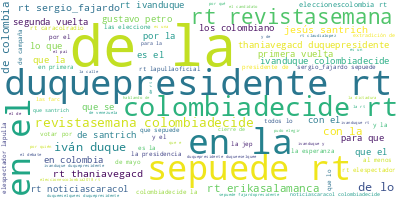

In [8]:
# Visualize the data we are working with at high level
all_text = ','.join(tweet_texts)
wordcloud = WordCloud(background_color='white', max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(all_text)
wordcloud.to_image()

In [9]:
# convert text to tokens then to dictionary/corpus
stop_words = stopwords.words('spanish')

def sent_to_words(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)
        

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


data_words = list(sent_to_words(tweet_texts))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30]) # words in first tweet

['rt', 'linaguevaras', 'cierre', 'campana', 'proximo', 'presidente', 'colombia', 'duquepresidente', 'duqueeselquees']


In [10]:
# create dictionary
id2word = corpora.Dictionary(data_words)

corpus = [id2word.doc2bow(text) for text in data_words]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [12]:
from pprint import pprint
num_topics = 10

lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
pprint(lda_model.print_topics())

[(0,
  '0.104*"rt" + 0.078*"colombiadecide" + 0.029*"petrogustavo" + '
  '0.027*"revistasemana" + 0.025*"duque" + 0.023*"candidato" + '
  '0.020*"ivanduque" + 0.017*"duquepresidente" + 0.016*"ivan" + '
  '0.013*"noticiascaracol"'),
 (1,
  '0.095*"rt" + 0.044*"lapulla" + 0.035*"si" + 0.027*"elecciones" + '
  '0.023*"colombiadecide" + 0.018*"presidenciales" + 0.016*"duquepresidente" + '
  '0.014*"colombianos" + 0.013*"sepuede" + 0.011*"quiero"'),
 (2,
  '0.108*"rt" + 0.049*"sepuede" + 0.033*"sergio_fajardo" + 0.024*"pais" + '
  '0.023*"colombiadecide" + 0.019*"voto" + 0.013*"colombia" + '
  '0.013*"claudialopez" + 0.013*"mejor" + 0.012*"duquepresidente"'),
 (3,
  '0.089*"rt" + 0.032*"colombiadecide" + 0.019*"colombia" + 0.015*"aqui" + '
  '0.014*"may" + 0.012*"the" + 0.012*"viva" + 0.010*"venezuela" + '
  '0.009*"impuesto" + 0.009*"nacional"'),
 (4,
  '0.099*"rt" + 0.048*"sepuede" + 0.035*"duquepresidente" + 0.032*"ivanduque" '
  '+ 0.030*"sergio_fajardo" + 0.019*"presidente" + 0.016*"fa

In [14]:
!pip3 install pyldavis

import pyLDAvis.gensim
import pickle
import pyLDAvis
import os

LDAvis_data_fp = 'ldavis_{}_topics'.format(num_topics)

pyLDAvis.enable_notebook()

if not os.path.exists(LDAvis_data_fp):
    print('* preparing pyLDAvis *')
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

    with open(LDAvis_data_fp, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
else:
    print('* loading pyLDAvis *')
    with open(LDAvis_data_fp, 'rb') as f:
        LDAvis_prepared= pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'ldavis_{}_topics.html'.format(num_topics))
LDAvis_prepared

  Using cached https://files.pythonhosted.org/packages/03/a5/15a0da6b0150b8b68610cc78af80364a80a9a4c8b6dd5ee549b8989d4b60/pyLDAvis-3.3.1.tar.gz
  Could not find a version that satisfies the requirement numpy>=1.20.0 (from pyldavis) (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0rc1, 1.13.0rc2, 1.13.0, 1.13.1, 1.13.3, 1.14.0rc1, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0rc1, 1.15.0rc2, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0rc1, 1.16.0rc2, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0rc1, 1.17.0rc2, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0rc1, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0rc1, 1.19.0rc2, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5)
No matching distribution found for numpy>=1.20.0 (from pyldavis)


ModuleNotFoundError: No module named 'pyLDAvis'